#                  Project Name – Santander Customer Transaction


#  Problem Statement

In [ ]:
In this challenge, we need to identify which customers will make a specific transaction in
the future, irrespective of the amount of money transacted.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_predict,cross_val_score
random_state=42
import gc

In [2]:
train_d=pd.read_csv("D:\\Santander_project\\train.csv")
test_d=pd.read_csv("D:\\Santander_project\\test.csv")

In [5]:
train_d.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [4]:
##shape of the dataset
train_d.shape

(200000, 202)

In [5]:
test_d.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [63]:
test_d.shape

(200000, 201)

In [6]:
##summary & splitting the numerical features
gc.collect()
train_d.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [3]:
##To count the target class variable
target_counts=train_d['target'].value_counts()
print('target_counts',target_counts)
percentage=target_counts/len(train_d)*100
print('percentage',percentage)

target_counts 0    179902
1     20098
Name: target, dtype: int64
percentage 0    89.951
1    10.049
Name: target, dtype: float64


So,  class 0 percentage=89%
     class 1 percentage=10%

From percentage of target class we can say that it is highly imbalanced dataset.


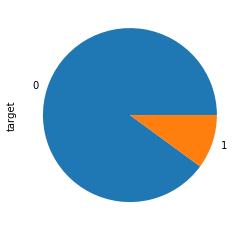

In [8]:
train_d['target'].value_counts().plot(kind='pie')

In [24]:
train_d.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

# To check Missing Values

In [9]:
train_d.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

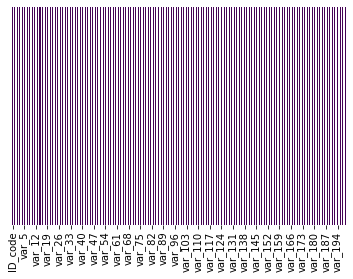

In [10]:
sns.heatmap(train_d.isnull(),yticklabels=False,cbar=False,cmap='viridis')


From the above graph and sum of the missing value function ,it is clear that there are no missing values present in the given dataset.

In [4]:
columns=train_d.columns
print(columns)
df1=pd.DataFrame(train_d,columns=columns)
df1.head()

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)


ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [8]:
numerical_features=columns[2:]
numerical_features

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

# Univariate Analysis

16

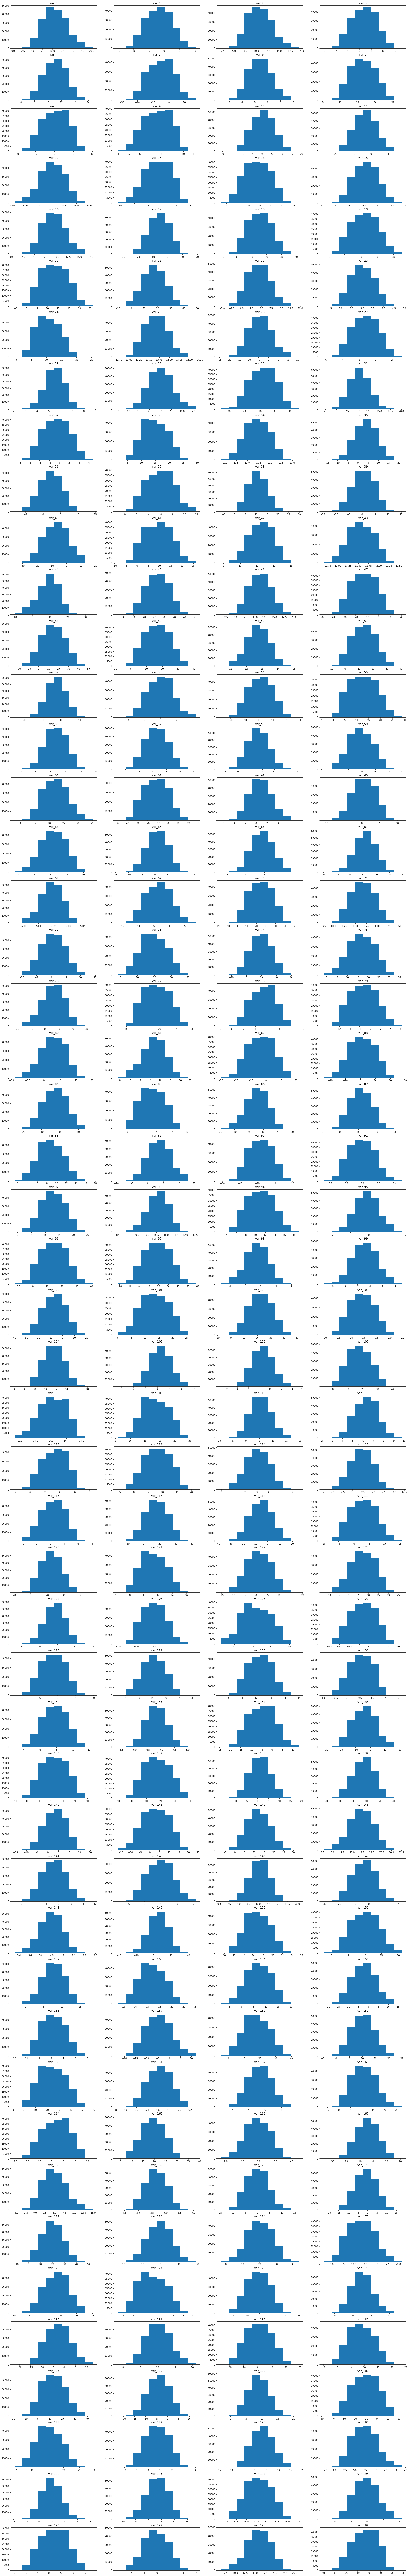

In [9]:
plt.figure(figsize=(30,200))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(train_d[col]) 
    plt.title(col)
gc.collect()

From the above histograms it is seen that almost all the variables are normally distributed.

Distributions columns for each target class


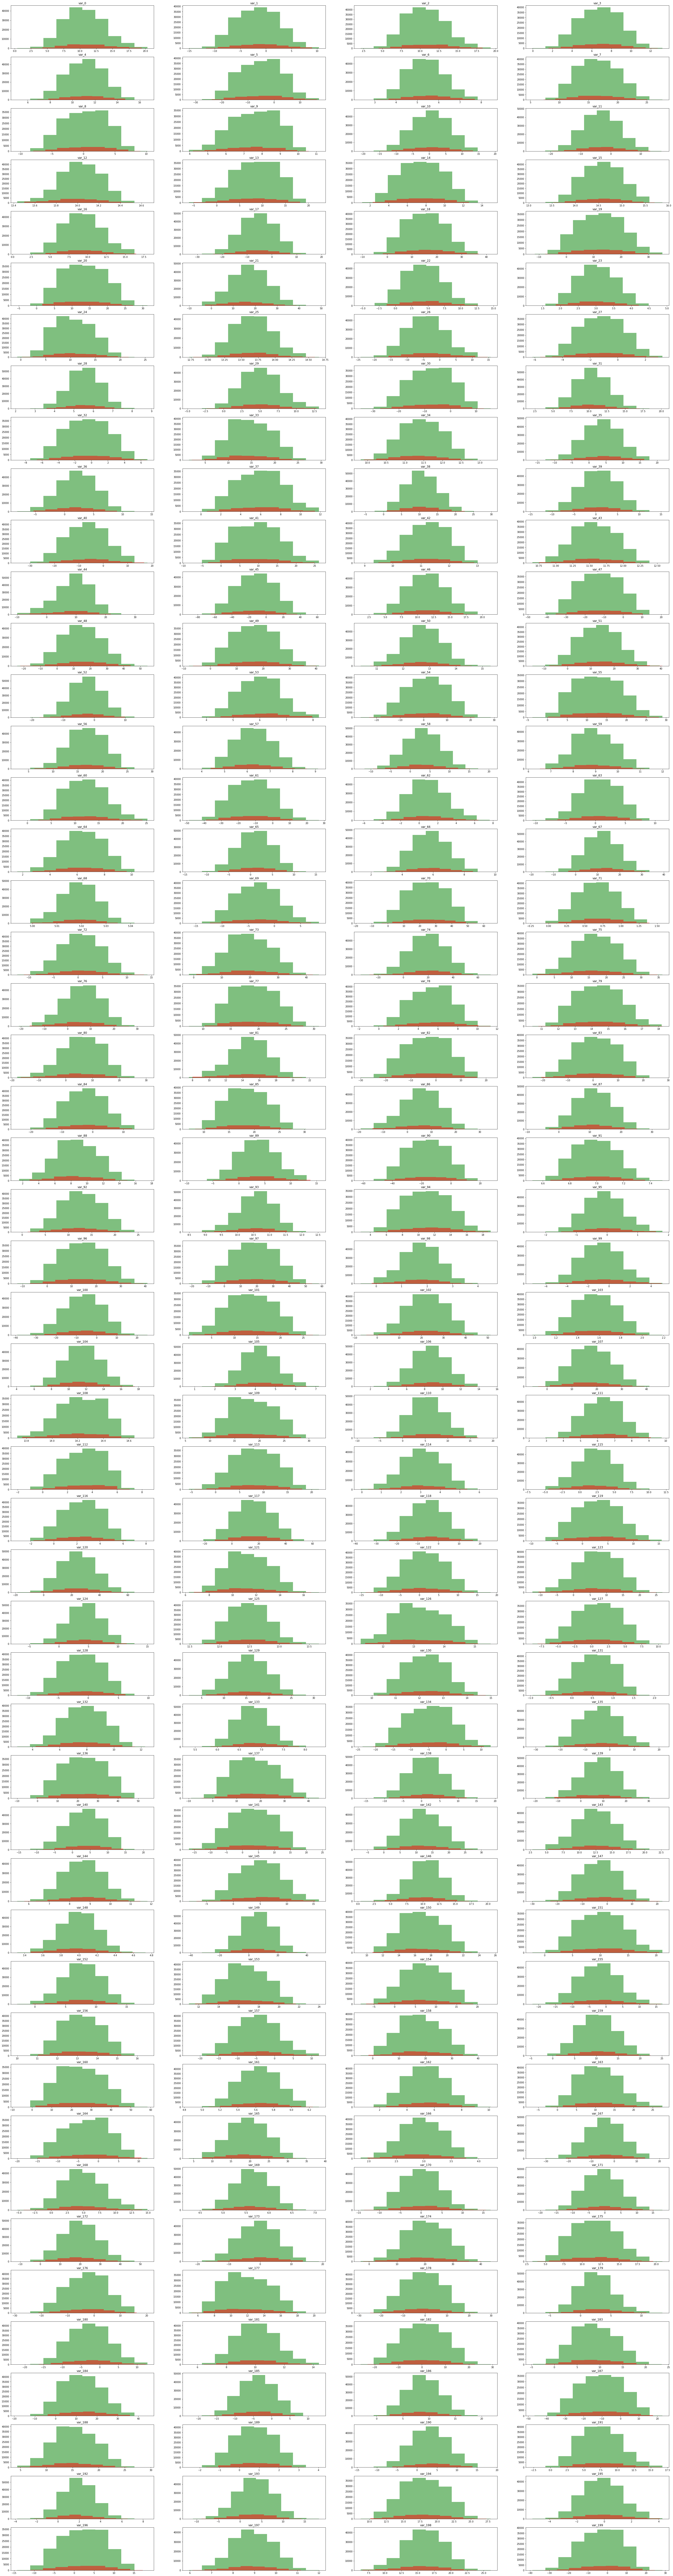

In [60]:
print('Distributions columns for each target class')
plt.figure(figsize=(50, 200))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(train_d[train_d["target"] == 0][col], alpha=0.5, label='0', color='g')
    plt.hist(train_d[train_d["target"] == 1][col], alpha=0.5, label='1', color='r')    
    plt.title(col)
gc.collect();



Distribution of numeric variables for train and test data


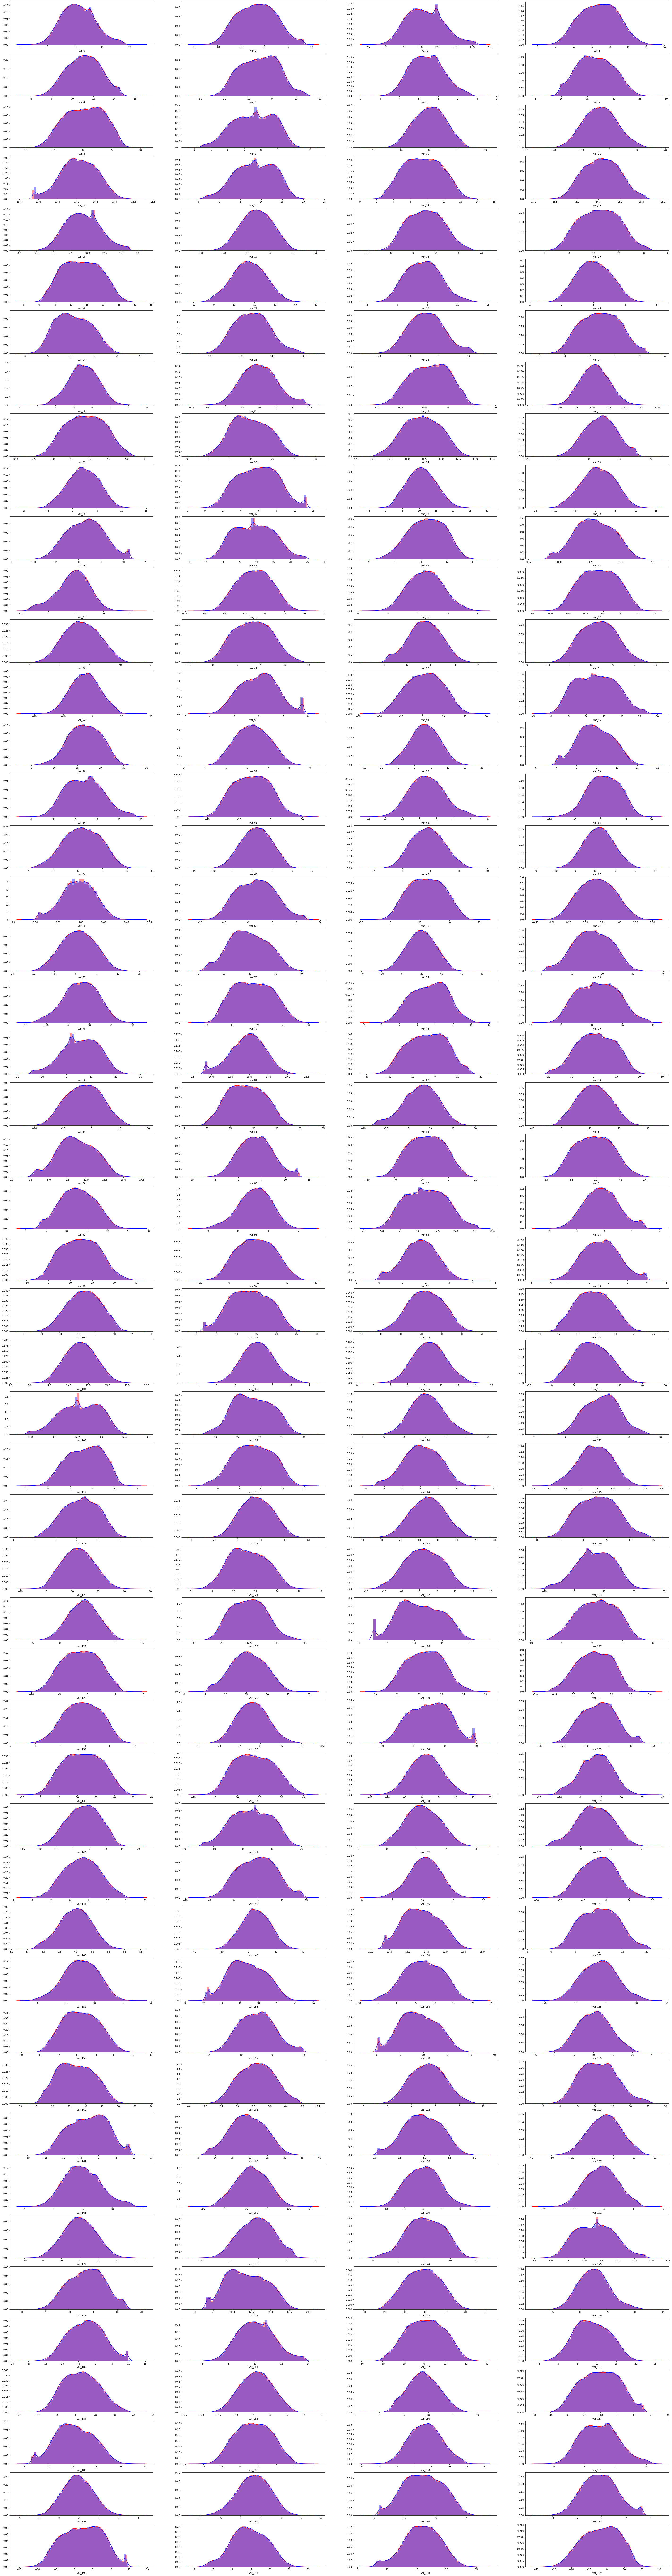

In [68]:
##Distribution of numeric variables for train and test data
print('Distribution of numeric variables for train and test data')
plt.figure(figsize=(50,200))
for i,col in enumerate(numerical_features):
    plt.subplot(50,4,i+1)
    sns.distplot(train_d[col],label='train',color='red')
    sns.distplot(test_d[col],label='test',color='blue')

# Distribution of Mean,Median,Max,Min both

In [69]:
numerical_features_v=train_d[2:202]

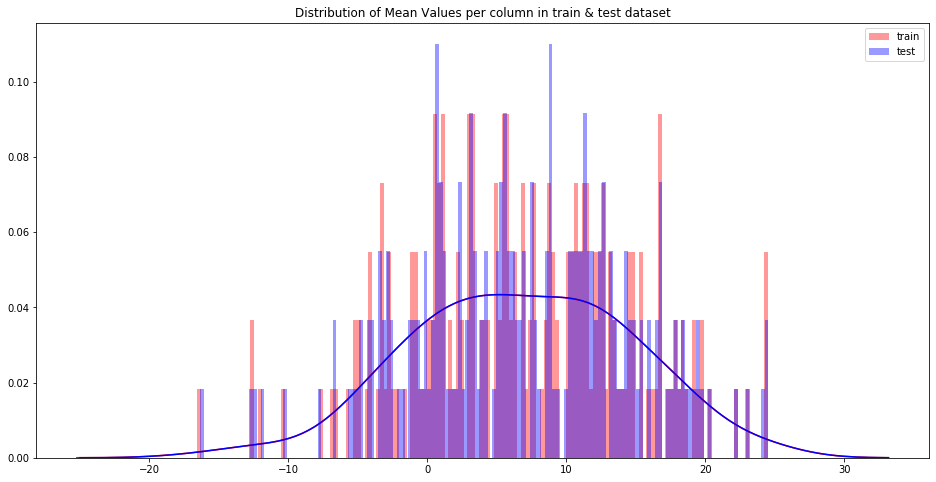

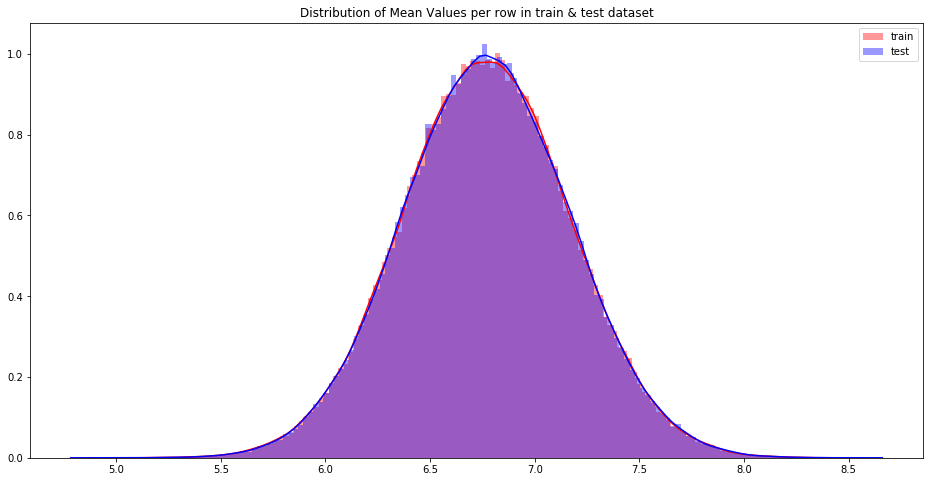

In [10]:
#Distribution of Mean Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=train_d.columns.values[2:202]

#Test attributes-
test_attributes=test_d.columns.values[1:201]

#Distribution plot for mean values per column in train attributes:
sns.distplot(train_d[train_attributes].mean(axis=0),color='red',kde=True,bins=150,label='train')

#Distribution plot for mean values per column in test attributes:
sns.distplot(test_d[test_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='test')

plt.title('Distribution of Mean Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of Mean Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for mean values per rows in train attributes:
sns.distplot(train_d[train_attributes].mean(axis=1),color='red',kde=True,bins=150,label='train')

#Distribution plot for mean values per rows in test attributes:
sns.distplot(test_d[test_attributes].mean(axis=1),color='blue',kde=True,bins=150,label='test')

plt.title('Distribution of Mean Values per row in train & test dataset')
plt.legend()
plt.show()


Wall time: 0 ns


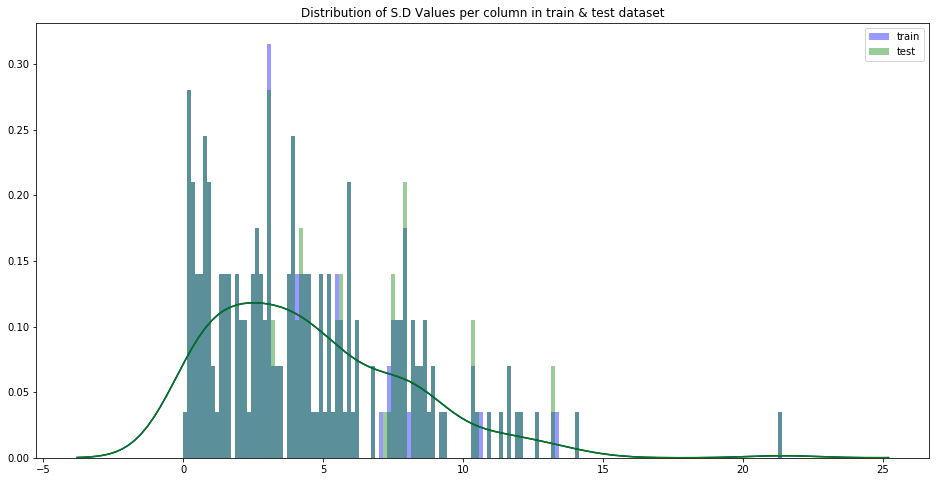

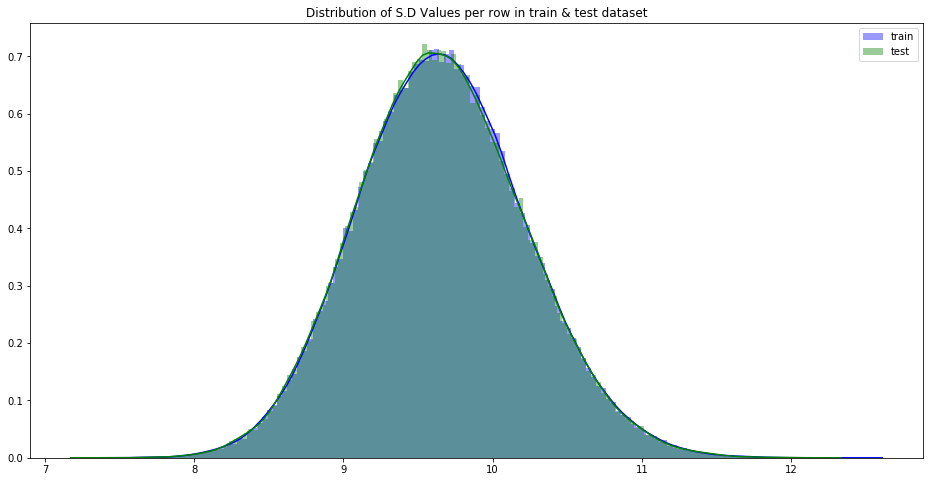

In [71]:
%time
#Distribution of S.D Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=train_d.columns.values[2:202]

#Test attributes-
test_attributes=test_d.columns.values[1:201]

#Distribution plot for S.D values per column in train attributes:
sns.distplot(train_d[train_attributes].std(axis=0),color='blue',kde=True,bins=150,label='train')

#Distribution plot for S.D values per column in test attributes:
sns.distplot(test_d[test_attributes].std(axis=0),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of S.D Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of S.D Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for S.D values per rows in train attributes:
sns.distplot(train_d[train_attributes].std(axis=1),color='blue',kde=True,bins=150,label='train')

#Distribution plot for S.D values per rows in test attributes:
sns.distplot(test_d[test_attributes].std(axis=1),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of S.D Values per row in train & test dataset')
plt.legend()
plt.show()


Wall time: 0 ns


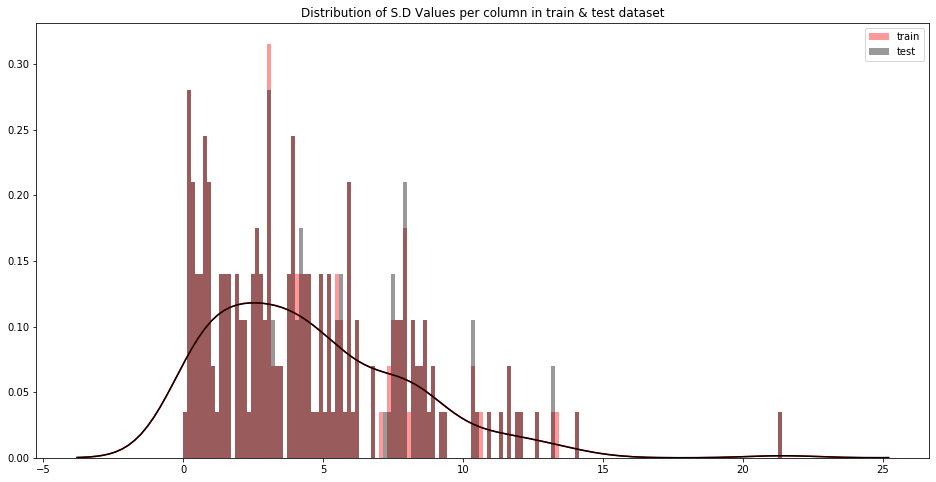

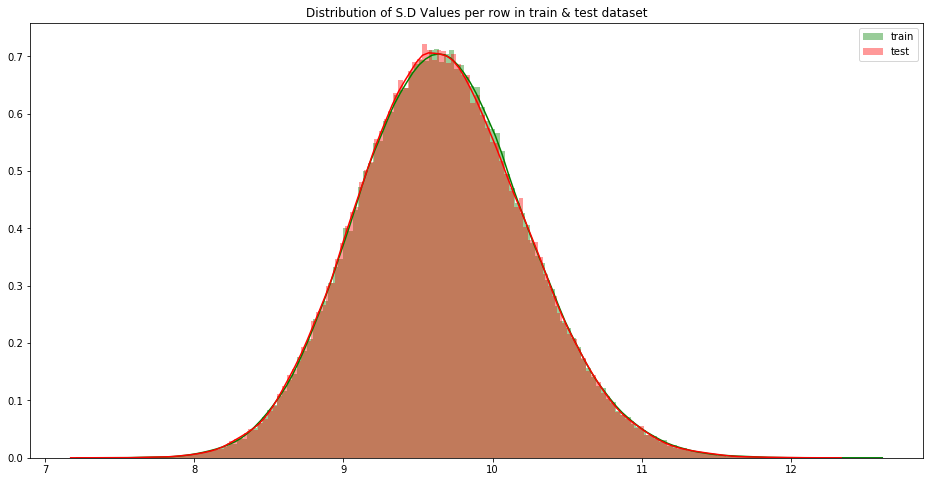

In [72]:
%time
#Distribution of S.D Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=train_d.columns.values[2:202]

#Test attributes-
test_attributes=test_d.columns.values[1:201]

#Distribution plot for S.D values per column in train attributes:
sns.distplot(train_d[train_attributes].std(axis=0),color='red',kde=True,bins=150,label='train')

#Distribution plot for S.D values per column in test attributes:
sns.distplot(test_d[test_attributes].std(axis=0),color='black',kde=True,bins=150,label='test')

plt.title('Distribution of S.D Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of S.D Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for S.D values per rows in train attributes:
sns.distplot(train_d[train_attributes].std(axis=1),color='green',kde=True,bins=150,label='train')

#Distribution plot for S.D values per rows in test attributes:
sns.distplot(test_d[test_attributes].std(axis=1),color='red',kde=True,bins=150,label='test')

plt.title('Distribution of S.D Values per row in train & test dataset')
plt.legend()
plt.show()


Wall time: 0 ns


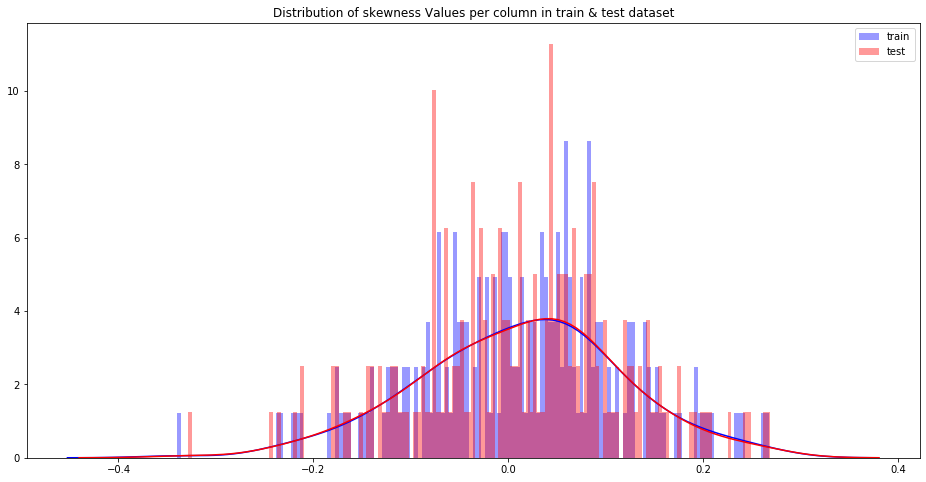

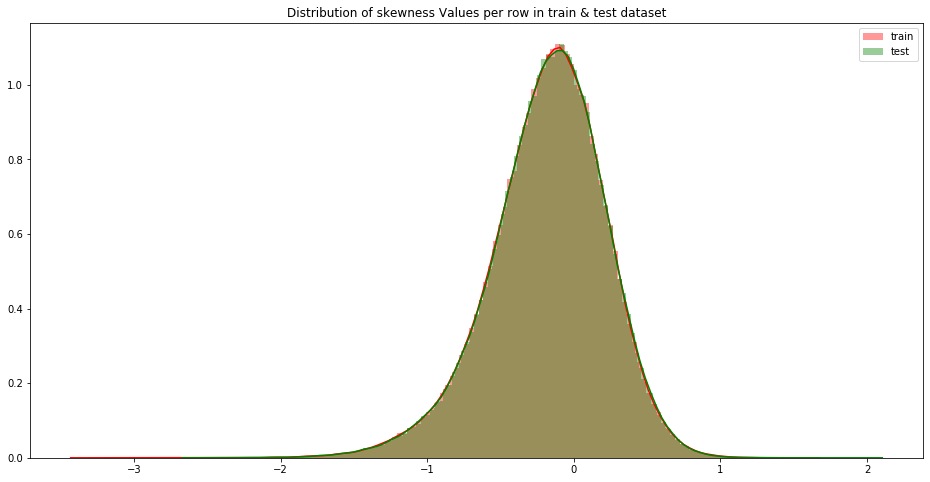

In [73]:
%time
#Distribution of skew Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=train_d.columns.values[2:202]

#Test attributes-
test_attributes=test_d.columns.values[1:201]

#Distribution plot for skew values per column in train attributes:
sns.distplot(train_d[train_attributes].skew(axis=0),color='blue',kde=True,bins=150,label='train')

#Distribution plot for skew values per column in test attributes:
sns.distplot(test_d[test_attributes].skew(axis=0),color='red',kde=True,bins=150,label='test')

plt.title('Distribution of skewness Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of skew Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for skew values per rows in train attributes:
sns.distplot(train_d[train_attributes].skew(axis=1),color='red',kde=True,bins=150,label='train')

#Distribution plot for skew values per rows in test attributes:
sns.distplot(test_d[test_attributes].skew(axis=1),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of skewness Values per row in train & test dataset')
plt.legend()
plt.show()


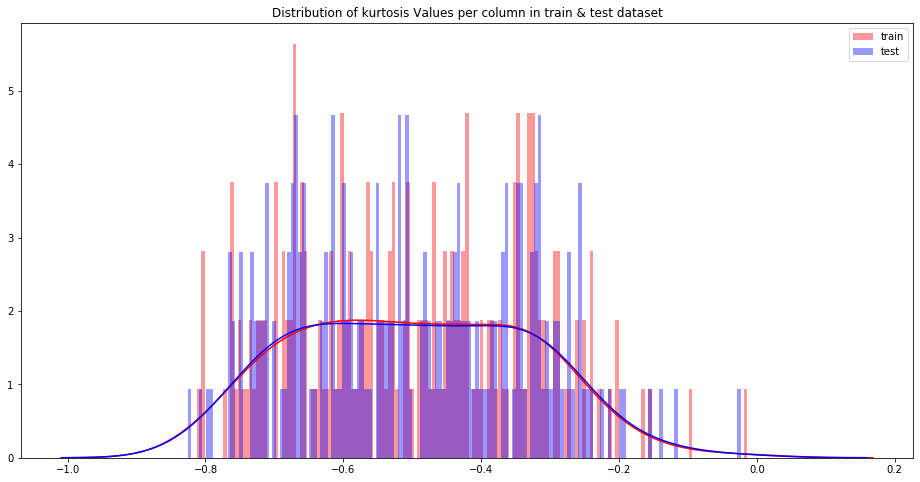

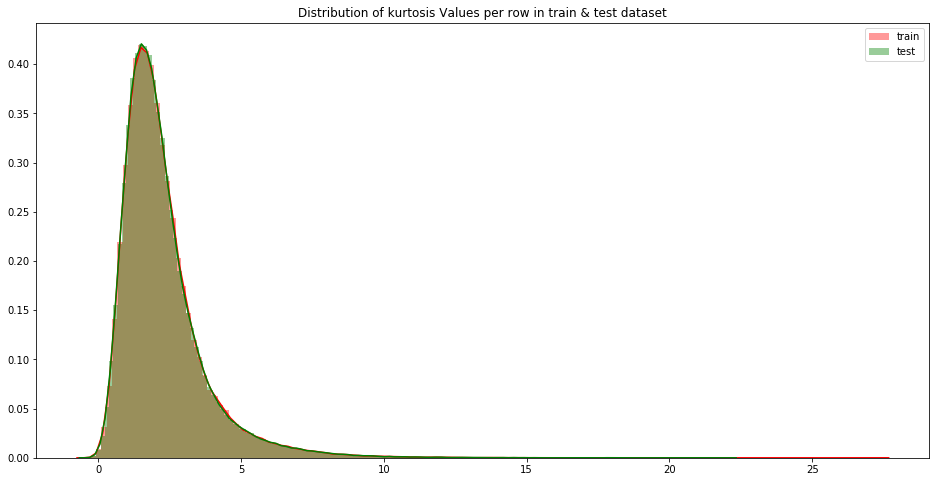

In [75]:
#Distribution of kurtosis Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=train_d.columns.values[2:202]

#Test attributes-
test_attributes=test_d.columns.values[1:201]

#Distribution plot for kurtosis values per column in train attributes:
sns.distplot(train_d[train_attributes].kurtosis(axis=0),color='red',kde=True,bins=150,label='train')

#Distribution plot for kurtosis values per column in test attributes:
sns.distplot(test_d[test_attributes].kurtosis(axis=0),color='blue',kde=True,bins=150,label='test')

plt.title('Distribution of kurtosis Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of kurtosis Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for kurtosis values per rows in train attributes:
sns.distplot(train_d[train_attributes].kurtosis(axis=1),color='red',kde=True,bins=150,label='train')

#Distribution plot for kurtosis values per rows in test attributes:
sns.distplot(test_d[test_attributes].kurtosis(axis=1),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of kurtosis Values per row in train & test dataset')
plt.legend()
plt.show()

Observations From the above Graphs 
standard deviation is relatively large for both train and test variable data.

min, max, mean, median, sdt values for train and test data looks quite close.

Mean values are distributed over a large range.

Moreover mean and median have simmilar distribution.

Both train and test are Leptokurtic and negatively skewed.

# To check Correlation

In [11]:
correlation=corr.unstack().drop_duplicates()
sorted_c=correlation.sort_values(kind='quicksort')
sorted_c=sorted_c.drop_duplicates()
print('Highly positively Correlated Values')
print(sorted_c[(sorted_c<1) & (sorted_c>0.5)].sort_values(ascending=False))
print('highly negatively correlated values')
print('highly neg correlated')
print(sorted_c[sorted_c< -0.005])

NameError: name 'corr' is not defined

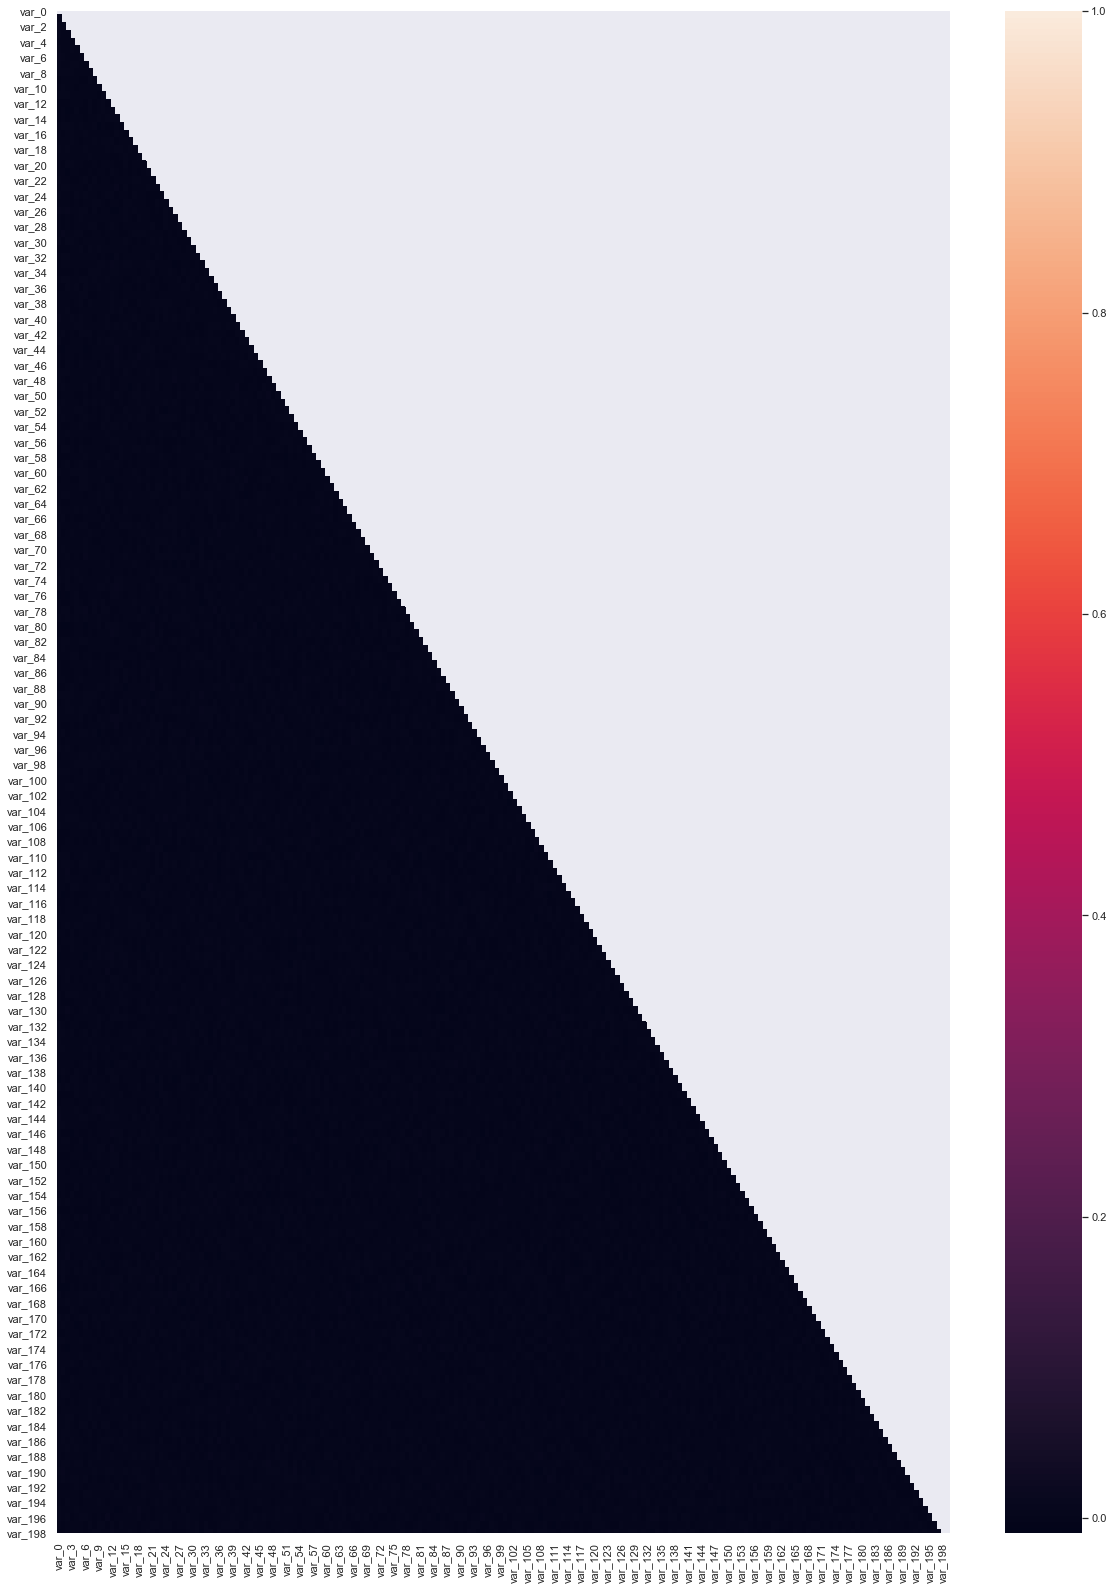

In [94]:
sns.set(rc={'figure.figsize':(20,28)})

# Compute the correlation matrix
corr = train_d[numerical_features].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask)

In [ ]:
corrmat=train_d.corr()
corrmat
## we will check the correlation among the  independent variables and remove if correlation is higher than 0.9



It is said that from the above correlation analysis,there is very small correlation amongst the variables of train dataset.

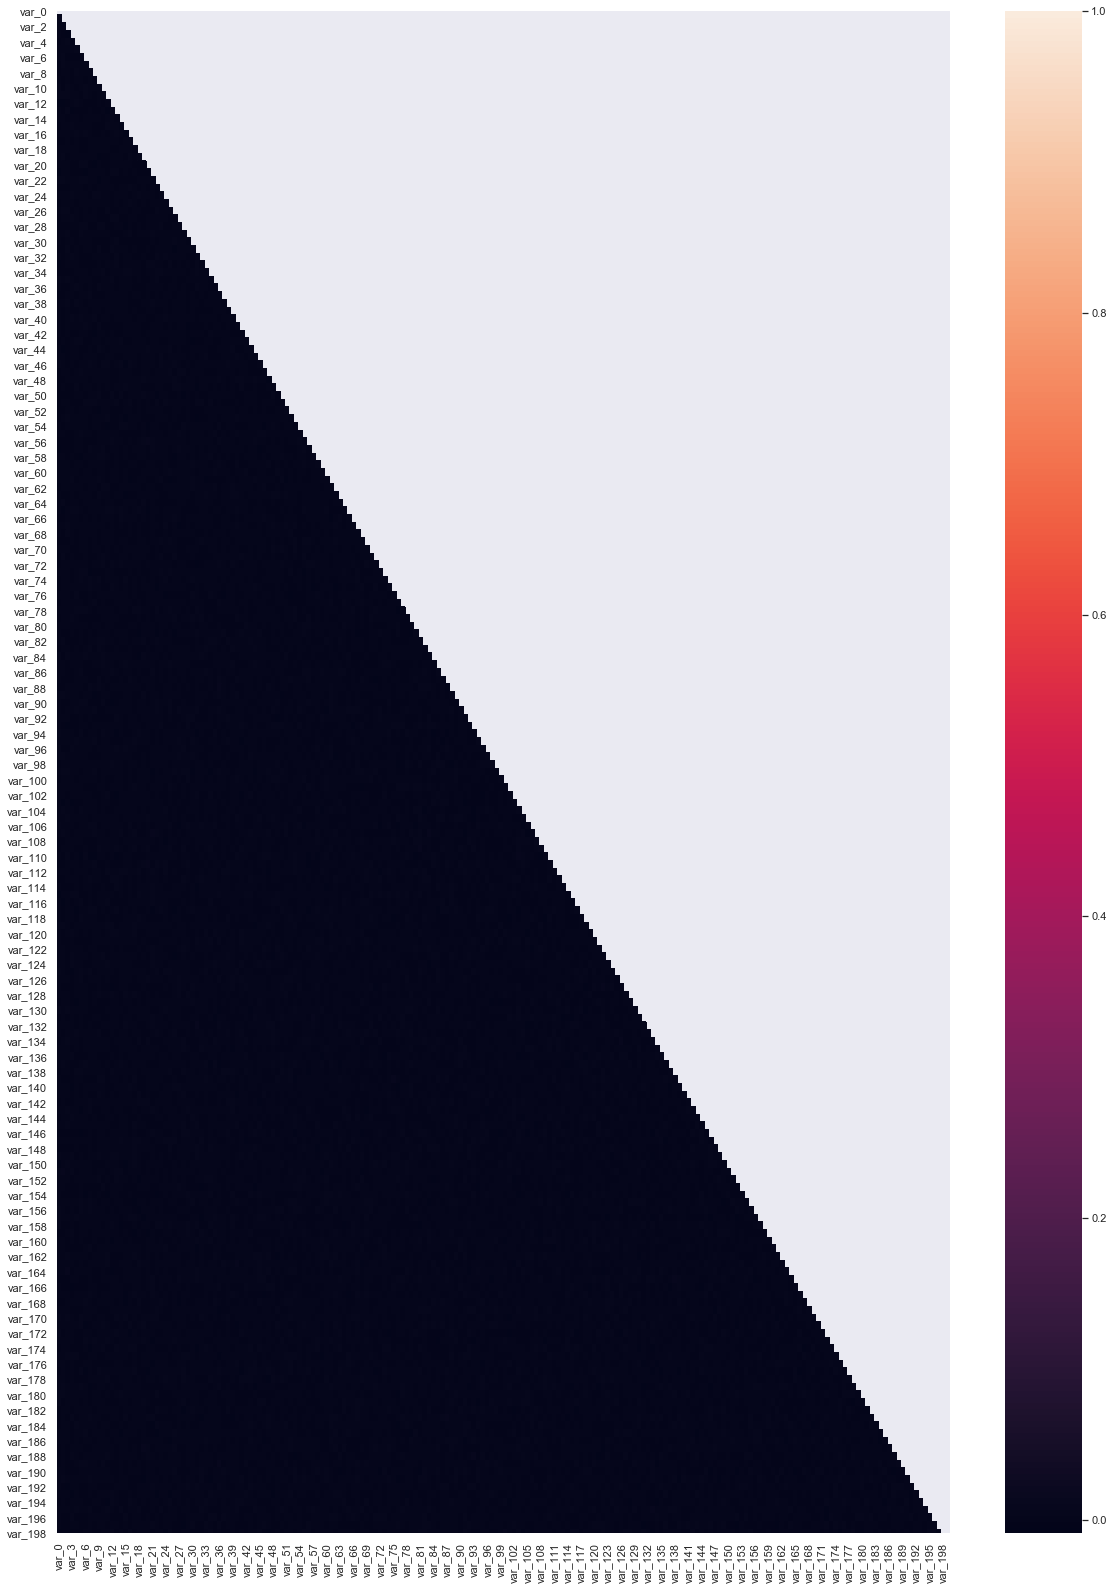

In [96]:
corrmat_test=test_d.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat_test,mask=mask)

In [ ]:
It is  concluded that there is very less correlation amongst the independent variables in test dataset.

# Outlier Analysis

In [12]:
Q1 = train_d.quantile(0.25)
Q3 = train_d.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


target      0.000000
var_0       4.304350
var_1       6.098650
var_2       3.794225
var_3       3.070025
             ...    
var_195     2.000300
var_196     8.503650
var_197     1.340500
var_198     4.235025
var_199    16.045275
Length: 201, dtype: float64


In [102]:
o=print(train_d < (Q1 - 1.5 * IQR)) |(train_d > (Q3 + 1.5 * IQR))
o.value_count('True')


        ID_code  target  var_0  var_1  var_10  var_100  var_101  var_102  \
0         False   False  False  False   False    False    False    False   
1         False   False  False  False   False    False    False    False   
2         False   False  False  False   False    False    False    False   
3         False   False  False  False   False    False    False    False   
4         False   False  False  False   False    False    False    False   
...         ...     ...    ...    ...     ...      ...      ...      ...   
199995    False   False  False  False   False    False    False    False   
199996    False   False  False  False   False    False    False    False   
199997    False   False  False  False   False    False    False    False   
199998    False   False  False  False   False    False    False    False   
199999    False   False  False  False   False    False    False    False   

        var_103  var_104  ...  var_90  var_91  var_92  var_93  var_94  var_95  \
0     

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

From the above Analysis we can say that all the datapoints are valid .
There is no outlier present in the dataset.

Handling of imblanced data:- We are going to use multiple approaches for dealing with imbalanced datasets.

- Change of performance matrix.
- Oversample minority class.
- Undersample majority class.
- SMOTE ( Synthetic Minority Oversampling technique)
- Change of algorithm.


In [13]:
##split the dataset by using K fold cross validation
X=train_d.drop(['ID_code','target'],axis=1)
Y=train_d['target']
##Stratified KFOLD cross Validator
skf=StratifiedKFold(n_splits=6,random_state=42,shuffle=True,)
for train_index,valid_index in skf.split(X,Y):
    X_train,X_valid=X.iloc[train_index],X.iloc[valid_index]
    y_train,y_valid=Y.iloc[train_index],Y.iloc[valid_index]

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (166667, 200)
Shape of X_valid : (33333, 200)
Shape of y_train : (166667,)
Shape of y_valid : (33333,)


In [14]:
%%time
logistic_model=LogisticRegression(random_state=42)
#fitting the model-
logistic_model.fit(X_train,y_train)

Wall time: 8.95 s


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
logistic_score=logistic_model.score(X_train,y_train)
print('Accuracy of logistic model:',logistic_score)

Accuracy of logistic model: 0.9147406820745434


In [15]:
%%time
#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(logistic_model,X_valid,y_valid,cv=5)
#Cross validation score-
cv_score=cross_val_score(logistic_model,X_valid,y_valid,cv=5)
print('cross val score :',np.average(cv_score))

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

cross val score : 0.909788880492969
Wall time: 15.8 s


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
#Confusion matrix:-
cm=confusion_matrix(y_valid,cv_predict)
cm=pd.crosstab(y_valid,cv_predict)
cm

col_0       0    1
target            
0       29515  468
1        2539  811

In [17]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_valid,cv_predict)
print('ROC Score:',roc_score)

ROC Score: 0.6132403536133163


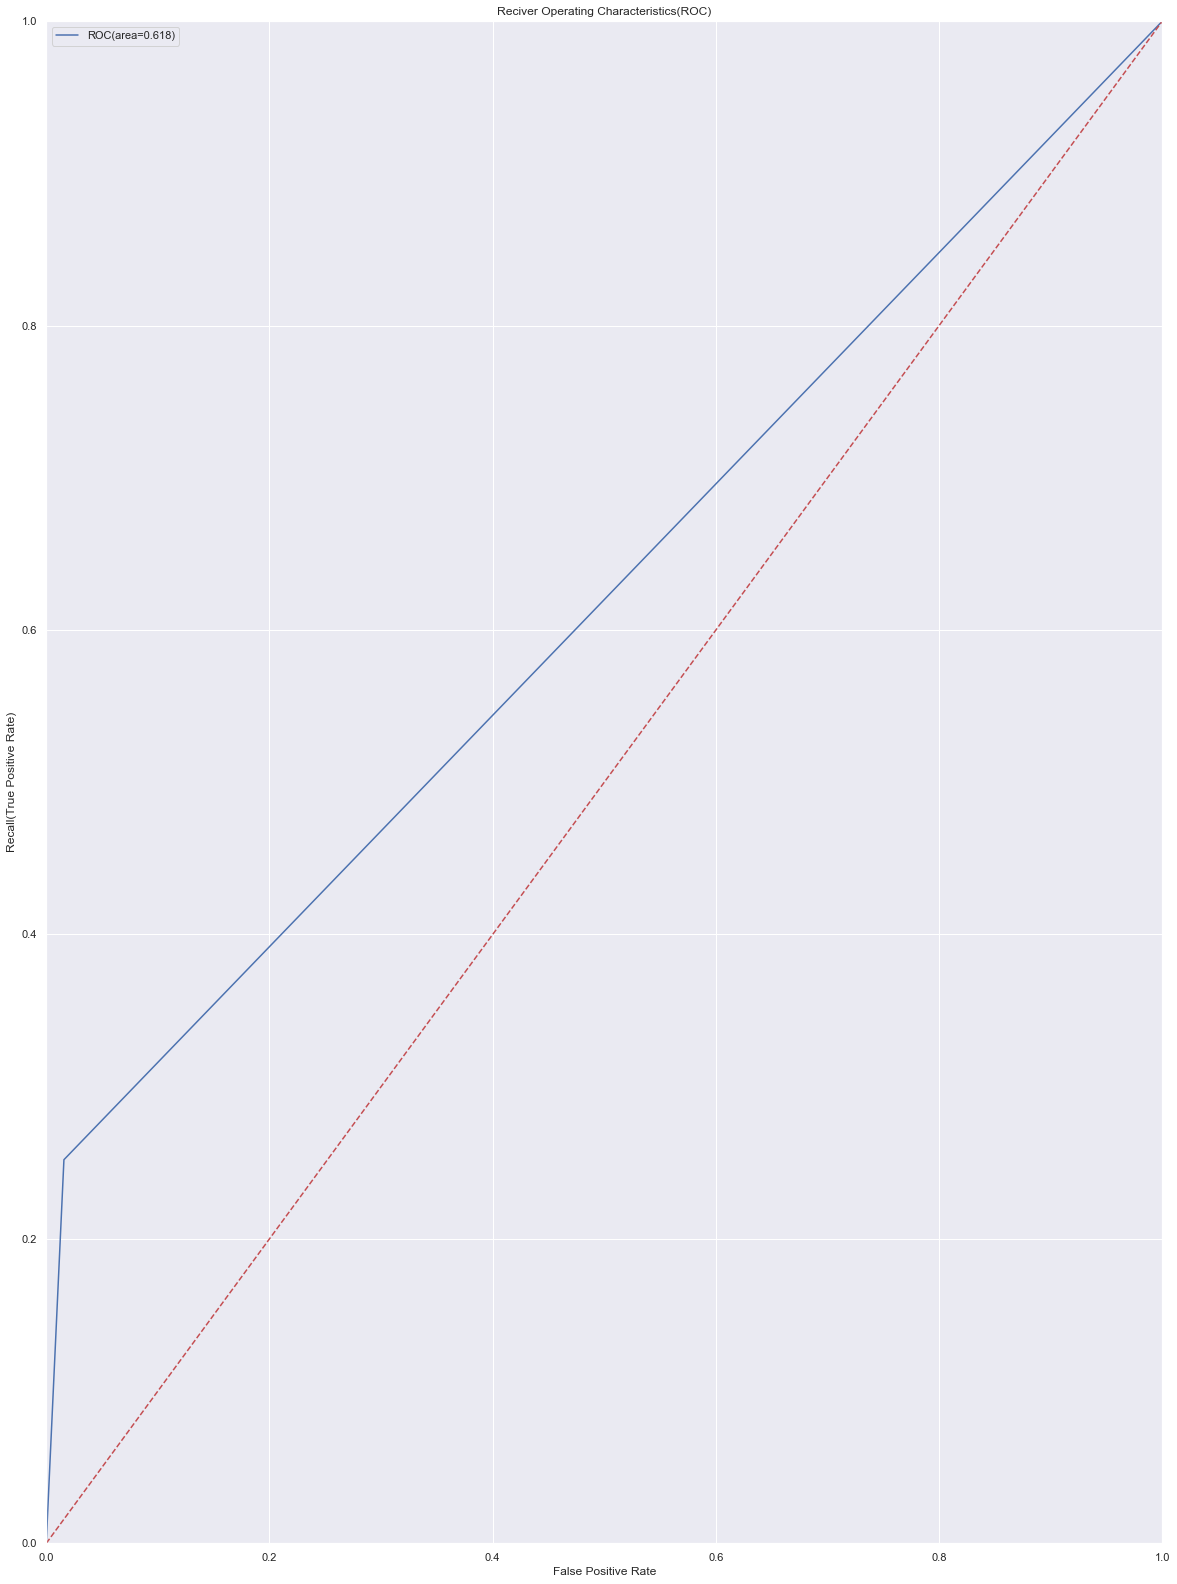

AUC: 0.6180866081901473


In [114]:
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

Since it is an imbalanced dataset model is not performing well on the basis of auc,roc curve.

In [18]:
%%time
#Model performance on test data:-
X_test=test_d.drop(['ID_code'],axis=1)
logistic_pred=logistic_model.predict(X_test)
print(logistic_pred)

[0 0 0 ... 0 0 0]
Wall time: 309 ms


In [ ]:
Oversample Minority Class:-

-Adding more copies of minority class.
-It can be a good option we dont have that much large data to work.
-Drawback of this process is we are adding info. That can lead to overfitting or poor performance on test data.
Undersample Mojorityclass:-

-Removing some copies of majority class.
-It can be a good option if we have very large amount of data say in millions to work.
-Drawback of this process is we are removing some valuable info. that can leads to underfitting & poor performance on        test data.
As per the drawbacks of both the model we will use SMOTE ( Synthetic Minority Oversampling technique) that is more best than the above as compare to above one's.

SMOTE ( Synthetic Minority Oversampling technique):- This is a statistical technique for increasing the number of cases in your dataset in a balanced way. It uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.



In [27]:
from imblearn.over_sampling import SMOTE
#SMOTE:-
sm = SMOTE(random_state=42)
#Generating synthetic data points
X_smote,y_smote=sm.fit_sample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_sample(X_valid,y_valid)



In [23]:
pip install imblearn

  Using cached https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c8/73/36a13185c2acff44d601dc6107b5347e075561a49e15ddd4e69988414c3e/imbalanced_learn-0.6.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%time
#Logistic regression model for SMOTE:-
smote=LogisticRegression(random_state=42)
#fitting the smote model:-
smote.fit(X_smote,y_smote)

In [28]:
%time
#Logistic regression model for SMOTE:-
smote=LogisticRegression(random_state=42)
#fitting the smote model:-
smote.fit(X_smote,y_smote)

Wall time: 0 ns


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Accuracy of the  SMOTE Model

In [29]:
#Accuracy of the model:-
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)


Accuracy of the smote_model : 0.7875552798511196


In [30]:
%%time
#Cross validation prediction for SMOTE:-
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score:-
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('Cross validation score :',np.average(cv_score))


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

Cross validation score : 0.7999535677675131
Wall time: 22.6 s


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
%%time
#Confusion matrix:-
cm=confusion_matrix(y_smote_v,cv_pred)
cm=pd.crosstab(y_smote_v,cv_pred)
cm

Wall time: 105 ms


col_0       0      1
target              
0       23581   6402
1        5594  24389

In [34]:
##ROC_AUC SCORE:-
roc_score=roc_auc_score(y_smote_v,cv_pred)
print('ROC score:',roc_score)

ROC score: 0.7999533068738952


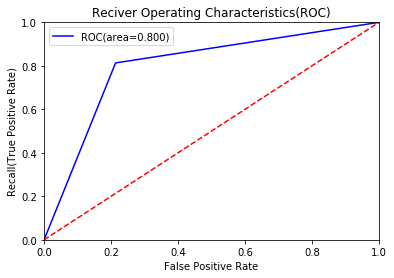

AUC: 0.7999533068738952


In [35]:
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [36]:
#Classification Report:-
scores=classification_report(y_smote_v,cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     29983
           1       0.79      0.81      0.80     29983

    accuracy                           0.80     59966
   macro avg       0.80      0.80      0.80     59966
weighted avg       0.80      0.80      0.80     59966



In [38]:
%%time
#Predicting the model-
X_test=test_d.drop(['ID_code'],axis=1)
smote_pred=smote.predict(X_test)
print(smote_pred)

[1 1 0 ... 0 0 1]
Wall time: 358 ms


In [ ]:
Observation:- We can observe that the smote model is performing well on imbalance data as compare to logistic regression.

